# 🚢 Titanic Survival Analysis

**Author:** Naman  
**Date:** February 2026 
**Tools:** Python, Pandas, Matplotlib, Seaborn

## Project Overview
This analysis explores the Titanic passenger dataset to understand what factors influenced survival during the 1912 disaster. Through exploratory data analysis, we examine the relationship between survival rates and key variables like gender, passenger class, age, and fare.

## Dataset
- **Source:** Kaggle Titanic Dataset
- **Size:** 891 passengers, 12 features
- **Target Variable:** Survived (0 = No, 1 = Yes)

---


In [14]:
#Import Necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1.Data Loading and Initial Analysis

In [15]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df.head())
print(f"\nShape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

S

## 2.Data Quality Assessment
### 2.1 Data Information
- Let's check the structure and datatypes of our dataset 

In [16]:
#Check basic data info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 2.2 Missing values - Raw count 

In [17]:
#count missing values
missing=df.isnull().sum()
print("Missing values count:")
print(missing)

Missing values count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 2.3 Missing values percentage

In [18]:
missing_percentage=(missing/len(df))*100
print("Missing percentage:")
print(missing_percentage)

Missing percentage:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


### 2.4 Missing data summary

In [19]:
missing_df=pd.DataFrame({
    'missing_count': missing ,
    'percentage': missing_percentage
        })
print("Columns with missing data:")
print(missing_df[missing_df['missing_count']>0].sort_values('missing_count',ascending=False))

Columns with missing data:
          missing_count  percentage
Cabin               687   77.104377
Age                 177   19.865320
Embarked              2    0.224467


### 3.Descriptive statistics

In [20]:
print("Numerical features summary:")
print(df.describe())
#Categorical Features
print("Categorical Features:")
print(f"Passenger_class:{df['Pclass'].unique()}")
print(f"Embarked_ports:{df['Embarked'].unique()}")
print(f"Gender_distribution:\n{df['Sex'].value_counts()}")

Numerical features summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Categorical Features:
Passenger_class:[3 1 2]
Embarke

## 4. Key Questions & Analysis

### Question 1: What was the overall survival rate?

In [21]:
#question1 : overall survival rate 
survival_rate= df['Survived'].mean()*100
print(f"survival rate:{survival_rate:.2f}%")

survival rate:38.38%


### Question 2: How did gender impact survival?

In [22]:
#question1.1: survival rate by gender
survival_rate_by_gender=df.groupby('Sex')['Survived'].mean()*100
print(f"\nSurvival By Gender:")
print(survival_rate_by_gender)


Survival By Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


### Question 3: Did passenger class affect survival chances?


Survival By Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


<Axes: title={'center': 'Survival rate by class'}, xlabel='Pclass'>

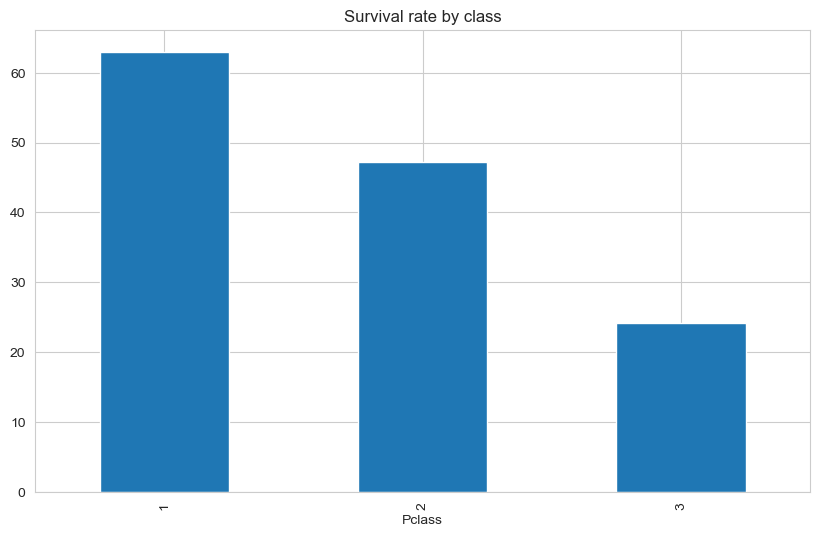

In [23]:
#question 2: which passenger class has the most survival rate 
survival_by_class=df.groupby('Pclass')['Survived'].mean()*100
print(f"\nSurvival By Class:")
print(survival_by_class)

survival_by_class.plot(kind='bar', title='Survival rate by class')

### Question 4: Did age influence survival?

In [28]:
#question3: Did age affect survivors
age_by_survival=df.groupby('Survived')['Age'].mean()
print("Average age:")
print(f"Did not survive:{age_by_survival[0]:.1f} years")
print(f"survied:{age_by_survival[1]:.1f} years")

Average age:
Did not survive:30.6 years
survied:28.3 years


## 5. Additional Visual Analysis

### Age Distribution of Passengers

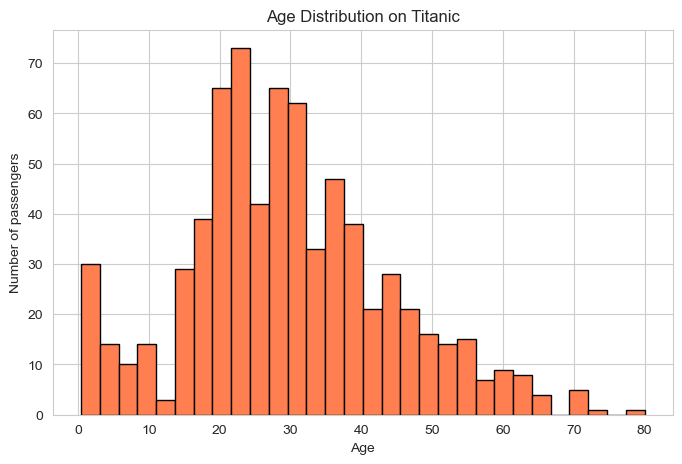

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(),bins=30,color='coral',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Age Distribution on Titanic')
plt.show()


# 5.2 Age Distribution- Survivors vs Non Survivors

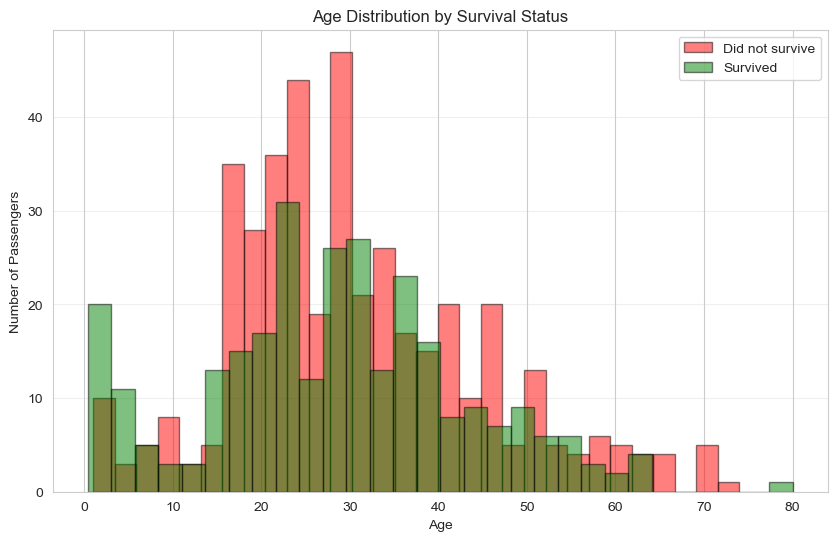

In [30]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load fresh data just for this visualization
df_viz = pd.read_csv("train.csv")

# Create the comparison chart
plt.figure(figsize=(10, 6))

# Red bars for people who died
df_viz[df_viz['Survived']==0]['Age'].hist(bins=30, alpha=0.5, color='red', edgecolor='black', label='Did not survive')

# Green bars for people who survived
df_viz[df_viz['Survived']==1]['Age'].hist(bins=30, alpha=0.5, color='green', edgecolor='black', label='Survived')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution by Survival Status')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 6. Gender and Class Analysis

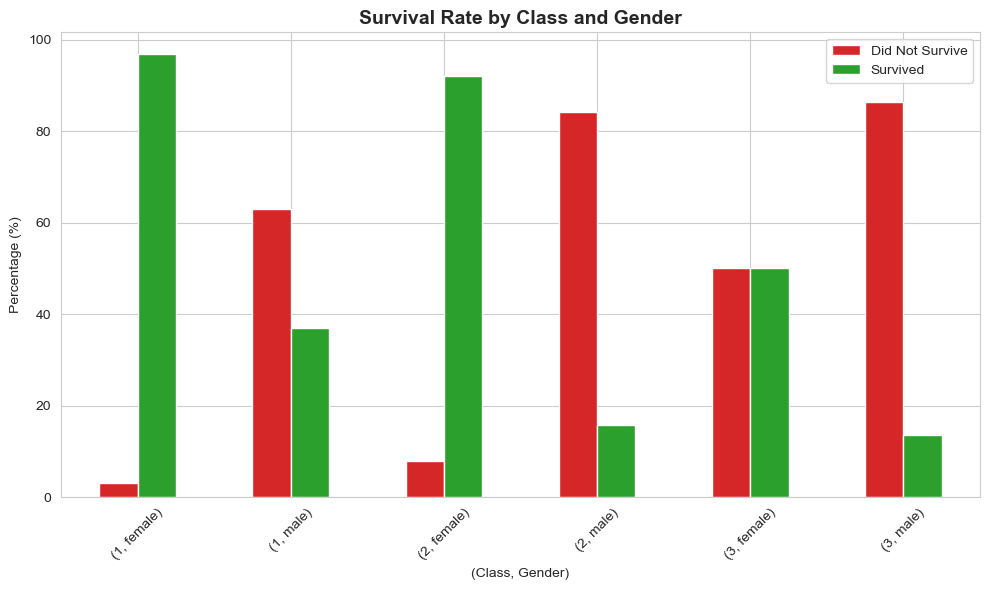


Survival Percentages:
Survived               0          1
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669


In [31]:
# Create a cross-tabulation
survival_gender_class = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'])
survival_gender_class_pct = survival_gender_class.div(survival_gender_class.sum(axis=1), axis=0) * 100

# Plot
survival_gender_class_pct.plot(kind='bar', figsize=(10, 6), color=['#d62728', '#2ca02c'])
plt.title('Survival Rate by Class and Gender', fontsize=14, fontweight='bold')
plt.xlabel('(Class, Gender)')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()

print("\nSurvival Percentages:")
print(survival_gender_class_pct)

## 6. Key Findings & Conclusions

### Critical Insights

1. **Gender was the strongest predictor of survival**
   - Women: 74% survival rate
   - Men: 19% survival rate
   - Gender mattered MORE than wealth

2. **Socioeconomic class created a survival hierarchy**
   - 1st Class: 63% survived
   - 2nd Class: 47% survived
   - 3rd Class: 24% survived

3. **The shocking reality: Class + Gender combined**
   - 3rd class women (50%) survived better than 1st class men (37%)
   - This proves "women and children first" was strictly enforced
   - Even poor women had priority over rich men

4. **Age had a moderate impact**
   - Children (0-10) had relatively better survival
   - Young adult men (20-40) died in massive numbers
   - Elderly passengers faced challenges reaching lifeboats

### Conclusion

The Titanic disaster revealed a stark hierarchy of survival based on gender and class. While the "women and children first" evacuation protocol significantly improved survival rates for women across all classes, socioeconomic status still played a major role. The data shows that being female was the single strongest predictor of survival, even more than wealth - a 3rd class woman had better odds than a 1st class man. This analysis demonstrates how intersecting social factors can become life-or-death variables in crisis situations.

---

**Analysis completed by:** Naman  
**Date:** February 2026 
**Tools:** Python, Pandas, Matplotlib, Seaborn